# "Learn to Code with Fantasy Football"
## Hands On Exercises from the Text

Text found here: https://fantasycoding.com/
Exercises completed by Calvin Miller

In [830]:
# import packages
import pandas as pd # data frames
import numpy as np # numeric arrays & math operations
import sqlite3 # SQL database
from os import path # filepath
from functools import reduce # list reduction
from bs4 import BeautifulSoup as Soup # HTML parsing
import requests # programmatically visit websites
import seaborn as sns # plotting
import statsmodels.formula.api as smf # stats models
from sklearn import model_selection as skms # model selection tools
from sklearn import ensemble as skens # ensemble methods

# set data directory
DATA_DIR = 'C:\\Users\\calvi\\Projects\\LTCWFF\\ltcwff-files\\ltcwff-files-main\\data'
OUT_DIR = 'C:\\Users\\calvi\\Projects\\LTCWFF\\output'

### 1. Introduction

Goal of text is to demonstrate how to use data analysis to consistent generate insights relating to fantasy football

#### What is Data?

Data as collection of structured information

Tabular data as having rows (observations) and columns (variables)

In [480]:
# Load Play-by-Play Data
pbp_df = pd.read_csv(path.join(DATA_DIR,'play_data_sample.csv'))

# Load Player/Game Data
pg_df = pd.read_csv(path.join(DATA_DIR,'player_game_2017_sample.csv'))

# Load Average Draft Position (ADP) Data
adp_df = pd.read_csv(path.join(DATA_DIR,'adp_2017.csv'))

# Load Games Data
games_df = pd.read_csv(path.join(DATA_DIR,
                               'game_2017_sample.csv'))

#### What is Analysis?

Data analysis as process of transforming raw data into insights (think of a funnel)

Types of data analysis:
 1 ) estimation of summary statistics (measures of central tendency, measures of spread, etc.)

 2 ) creation of models to understand how variables relate to each other

Models have use in both making sense of historical data and making predictions about future data.

Model training/fitting: use of observed data to estimate relationship between predictive variables and response variable

Model testing: evaluation of model output (e.g. predictions) against actual outcomes

#### Data Analysis Process

 1 ) Data Collection: web-scraping, public datasets, manual entry, remote sensors, etc.

 2 ) Data Storage: in CSV, database, etc.

 3 ) Load Data: load relevant files (or rows/columns of tables) into analysis tool of choice

 4 ) Data Manipulation: cleaning data, efforts to make sense of outliers or missing data, etc.

 5 ) Analyzing Data: use raw data to create model, find relationships, make predictions or recommendations, etc.

In [10]:
# Exercises

## 1.1. Granularity of data sets
    # a) game/quarter/team
    # b) game/player
    # c) player/season
    # d) player/week
    # e) position

## 1.2. Summary Stats
    # "Explosive" players may be identified by reviewing the 
    # distribution of performance on plays - specifically looking 
    # for longer/heavier tails in positive direction

## 1.3. Predict game total score with weather data alone
    # a) Inputs: wind speed, temp
    # b) Output: total score of game
    # c) Granularity: single game
    # d) Limitations: does not include info about the games/teams
    
## 1.4. Where in pipeline?
    # a) get data to right granularity -> data manipulation
    # b) experiment w/models -> data analysis
    # c) dealing with missing data -> data manipulation
    # d) SQL -> store/load data
    # e) scrape website -> collect data
    # f) plot data -> data analysis
    # g) get data from API -> data collection
    # h) pandas -> load data / manipulate data
    # i) take mean of variables -> data analysis
    # j) combine data sources -> load data / data manipulation

### 2. Python

Python programming commonly uses 3P code from libraries/packages

Some common libraries: Pandas - tabular data manipulation; BeautifulSoup - scrape data from websites; scikit-learn - machine learning; statsmodels - statisical models

In [47]:
# Quick tour of standard Python library

# comments behind the "#"
# comments good for explaining complex functions, loops, conditionals

print(1+1) # no commet really needed for simple commands

variable_in_snake_case = 4 # variable assignment

print(variable_in_snake_case*2)

# variable update
variable_in_snake_case = variable_in_snake_case * 100
print(variable_in_snake_case)

# common data types
var_int = 48
var_float = 22.4
var_string = 'Words'
var_string_alt = "More Words"
var_bool = True
var_bool_alt = 2 < 3

print(type(var_string))

var_fstring = f'{var_string}, {var_string_alt}, together'
print(var_fstring)

# string methods
print(var_string.upper())

# comparison operators
test_true = 1 < 2
test_true = 5 > 4
test_true = 3 <= 4
test_true = 4 >= 3
test_true = 1 == 1
test_true = 1 != 10

# conditionals
if var_bool:
    message = "Test 1 was True"
elif var_bool_alt:
    message = "Test 1 was False and Test 2 was True"
else:
    message = "Neither test was True"
    
print(message)

# containers
var_list = ['a1','b2','c3']
print(var_list[0]) # Python uses 0-indexing

var_dict = {'qb': 'mac jones', # note these use keys: values
           'rb': 'najee harris',
           'wr': 'devonta smith'}
print(var_dict['wr']) # you can access values by referring to keys
var_dict['cb'] = 'patrick surtain ii' # add to dictionary

# unpacking
a, b, c = var_list # require equal length on both sides
print(a)

# loops
i = 0
for entry in var_list:
    print(var_list[i])
    i += 1

for x, y in var_dict.items():
    print(f'pos: {x}')
    print(f'name: {y}')

# list comprehensions
var_list_alt = ['bill smith', 'tom green', 'john johnson']

var_list_alt_proper = [x.title() for x in var_list_alt]
    # list comprehension has form [a for b in c]
    # where c is the list you're iterating over
    # where a is the function/method being applied
    # where b is the variable to refer to elements of c
print(var_list_alt_proper)

var_list_alt_upper = [x.upper() for x in var_list_alt]
print(var_list_alt_upper)

var_list_alt_first = [x.split(' ')[0] for x in var_list_alt]
    # comprehension is "mapping" a method/function to an item
print(var_list_alt_first)

var_list_alt_filter = [ 
    x for x in var_list_alt if x.__contains__('s')]
    # can use comprehension to conditionally act
    # [a in b for c if d]
print(var_list_alt_filter)

# dict comprehensions
var_dict_comp = {
    name.split(' ')[0].upper(): pos for pos, name in var_dict.items()
}
print(var_dict_comp)

# common functions
print(len(var_list)) # number of items in a list

def fantasy_pts_rec(yds=0, rec=0, tds=0, ppr=1):
    """
    three quotes used to allow multi-line comments/strings
    
    generally try to avoid function side effects:
        only use variables internal to function
        limit output to return value when possible
        
    function takes yards, receptions, and touchdowns and
        returns fantasy points scored
    
    note inputs all take zero value by default
    """
    return yds*0.1 + rec*ppr + tds*6

print(fantasy_pts_rec(127, 5, 2))
# unspecified inputs assumed to be in same order as function def
# for this reason, convention os to place important keywords first

print(fantasy_pts_rec(127, 5, ppr=2))

# libraries are sets of functions and types/classes

2
8
400
<class 'str'>
Words, More Words, together
WORDS
Test 1 was True
a1
devonta smith
a1
a1
b2
c3
pos: qb
name: mac jones
pos: rb
name: najee harris
pos: wr
name: devonta smith
pos: cb
name: patrick surtain ii
['Bill Smith', 'Tom Green', 'John Johnson']
['BILL SMITH', 'TOM GREEN', 'JOHN JOHNSON']
['bill', 'tom', 'john']
['bill smith', 'john johnson']
{'MAC': 'qb', 'NAJEE': 'rb', 'DEVONTA': 'wr', 'PATRICK': 'cb'}
3
29.700000000000003
22.700000000000003


#### How to Figure Things Out in Python

Official Python documentation: 
https://docs.python.org/3/index.html

Python quick reference: 
https://www.cs.put.poznan.pl/csobaniec/software/python/py-qrc.html

Google "Python {issue / target command / etc.}"

StackOverflow

In [81]:
# Exercises

## 2.1. valid Python variable names
    # do not start with number
    # not strings
    # only allowed non-alphanumeric character is "_"
    # "_" can be at beginning
    # convention is snake_case not camelCase

## 2.2. arithmetic
weekly_points = 100
weekly_points += 28
weekly_points += 5

print(f'weekly_points={weekly_points}')

## 2.3. function def
def for_the_td(player1, player2):
    """
    proclaims that player1 went to player 2 for the TD
    """
    return f'{player1} to {player2} for the TD!'

print(for_the_td('Dak','Zeke'))

## 2.4. method
    # method .islower() evaluates whether string all lower case
    # returns Boolean

test_str = 'test'
print(test_str.islower())
test_str = 'Test'
print(test_str.islower())

## 2.5. function def
def is_leveon(player):
    """
    evaluates whether player name is "Le'Veon Bell"
    with or without the '
    """
    return player.replace("'","").upper() == "LEVEON BELL"

lbell_without = "LeVeon Bell"
lbell_with = "Le'Veon Bell"
lbell_not = "Leveone Bell"
print(is_leveon(lbell_without))
print(is_leveon(lbell_with))
print(is_leveon(lbell_not))

## 2.6. function with conditional
def commentary(score):
    """
    provides comment on whether score good/bad with limit 100
    """
    if score >= 100:
        comment = f'{score} is a good score'
    else:
        comment = f"{score}'s not that good"
    return comment
        
print(commentary(77))
print(commentary(127))

## 2.7. three ways to print list without last entry
example_list = ['dave', 'steve', 'rick', 'dan']
print(example_list[:3])
print([name for name in example_list if name != 'dan'])
print(example_list[:-1])

## 2.8. dictionary element changes 
simple_dict = {'n_teams': 12, 'ppr': True}

simple_dict['n_teams'] = 10 # update single position
print(simple_dict)

def toggle_ppr(league):
    """
    function to switch boolean key values for 'ppr' in league
    """
    league['ppr'] = not league['ppr']

toggle_ppr(simple_dict)
print(simple_dict)
toggle_ppr(simple_dict)
print(simple_dict)

## 2.9 dict question
    # dict needs key's value specified when adding key
    # dict keys are strings, not unassigned variables
    # dict can't output values for keys that don't exist
    
## 2.10 list question
roster_list = ['tom brady', 'adrian peterson', 'antonio brown']

for dude in roster_list: # print last names
    print(dude.split(' ')[1])

name_dict = {name: len(name) for name in roster_list} 
    # create dictionary with comprehension
print(name_dict)

## 2.11. comprehensions
my_roster_dict= {'qb':'tom brady',
                 'rb1':'adrian peterson',
                 'wr1':'davante adams',
                 'wr2':'john brown'}

my_roster_positions = [pos for pos, name in my_roster_dict.items()]
print(my_roster_positions)

my_roster_names_ab = [name 
                       for pos, name in my_roster_dict.items() 
                       if name.split(' ')[1].startswith('a') 
                       or name.split(' ')[1].startswith('b')]
print(my_roster_names_ab)

## 2.12. functions
def mapper(list_name, function_name):
    """
    applies function function_name to each element in
    list list_name
    """
    return[function_name(i) for i in list_name]

def rushing_pts_calc(yards):
    return 0.1*yards

rush_yds = [1, 10, 20, 100, 123, 3, 0, 0]
rush_pts = mapper(rush_yds, rushing_pts_calc)
print(rush_pts)



weekly_points=133
Dak to Zeke for the TD!
True
False
True
True
False
77's not that good
127 is a good score
['dave', 'steve', 'rick']
['dave', 'steve', 'rick']
['dave', 'steve', 'rick']
{'n_teams': 10, 'ppr': True}
{'n_teams': 10, 'ppr': False}
{'n_teams': 10, 'ppr': True}
brady
peterson
brown
{'tom brady': 9, 'adrian peterson': 15, 'antonio brown': 13}
['qb', 'rb1', 'wr1', 'wr2']
['tom brady', 'davante adams', 'john brown']
[0.1, 1.0, 2.0, 10.0, 12.3, 0.30000000000000004, 0.0, 0.0]


### 3. Pandas

Full docs: https://pandas.pydata.org/pandas-docs/stable/index.html#pandas-documentation

User Guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

R comparison: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html#compare-with-r

SQL comparison: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql

#### Part 1: Intro to Pandas

Pandas is an external library for working with data, particularly for data manipulation (joining, filtering, modifying, etc.)

##### Types and Functions

DataFrame: holds a single data table

Series: single column of a DataFrame

Functions include: reading from CSV, writing to CSV, printing table header, selecting subsets of columns, selecting subsets of rows (filtering), modifying/adding columns, changing level of granularity, merging/joining tables

In [479]:
# Basic Functionality of Pandas

# Load Play-by-Play Data
pbp_df = pd.read_csv(path.join(DATA_DIR,
                               'play_data_sample.csv'))
pg_df = pd.read_csv(path.join(DATA_DIR,
                              'player_game_2017_sample.csv'))
adp_df = pd.read_csv(path.join(DATA_DIR,
                               'adp_2017.csv'))

print(type(adp_df))


# DataFrame Methods and Attributes
adp_df.head(3) # method takes argument; head default is 5 rows

print(adp_df.columns) # attribute doesn't need extra input

print(adp_df.shape) # attribute shape = (rows, columns)


# Working with Subsets of columns
adp_df['name'].head()
print(type(adp_df['name'])) # single column is Series by default
print(type(adp_df['name'].to_frame())) # method changes to DF

adp_df[['name','position','adp']].head() # supplying list of columns
print(type(adp_df[['name','position','adp']])) # >1 columns is DF


# Indexing = assign ID to rows, default as 0:n-1
adp_df.set_index('player_id').head() # can reindex to a column
adp_df.set_index('player_id', inplace=True) # 1 way to overwrite
adp_df = adp_df.reset_index()
adp_df = adp_df.set_index('player_id') # other way to overwrite


# Use of Indices
adp_df_rbs = adp.loc[adp['position'] == 'RB',['name','team']]
adp_df_rbs.head() # used .loc to get columns/rows meeting condition

adp_df_rbs['times_drafted'] = adp_df['times_drafted']
adp_df_rbs.head() # add col to new df using index match in old df


# Outputting Data
adp_df_rbs.to_csv(path.join(DATA_DIR, 'adp_rb.csv'), # write CSV
                 index=False) # exclude index from file


# Exercises
## 3.0.1 load adp data
adp_df = pd.read_csv(path.join(DATA_DIR,
                               'adp_2017.csv'))

## 3.0.2 report top 50 players by adp
adp_df_50 = adp_df.nlargest(50, columns=['adp'])
print(adp_df_50.shape)

## 3.0.3 sort adp data by name desc
adp_df.sort_values('name', ascending = False)

## 3.0.4 what is type of adp_df.sort_values('adp')
print(type(adp_df.sort_values('adp'))) # sorted df is still df

## 3.0.5 create new df
adp_df_simple = adp_df[['name','position','adp']]
print(adp_df_simple.head(2))
adp_df_simple = adp_df_simple[['position','name','adp']]
    # alternative:
    # adp_df_simple.reindex(columns=['position','name','adp'])
print(adp_df_simple.head(2))
adp_df_simple['team'] = adp_df['team']
print(adp_df_simple.head(2))
adp_df_simple.to_csv(path.join(DATA_DIR, 'adp_simple.txt'),
                     sep='|') # to_csv can write .txt

<class 'pandas.core.frame.DataFrame'>
Index(['adp', 'adp_formatted', 'bye', 'high', 'low', 'name', 'player_id',
       'position', 'stdev', 'team', 'times_drafted'],
      dtype='object')
(184, 11)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(50, 11)
<class 'pandas.core.frame.DataFrame'>
            name position  adp
0  David Johnson       RB  1.3
1    LeVeon Bell       RB  2.3
  position           name  adp
0       RB  David Johnson  1.3
1       RB    LeVeon Bell  2.3
  position           name  adp team
0       RB  David Johnson  1.3  ARI
1       RB    LeVeon Bell  2.3  PIT


#### Part 2: Things You Can Do With DataFrames

Broadly, capabilities fall into categories:

 1 ) Change or create columns

 2 ) Calculate statistics of DataFrames/Series

 3 ) Filter observations (subset rows)

 4 ) Change granularity of data

 5 ) Merge (or Join) and Concatenate DataFrames with pd.merge() and pd.concat()

In [216]:
# Creating and modifying columns
pg_df['pts_per_pass_td'] = 4 # create column
pg_df[['gameid','player_id','pts_per_pass_td']].head()

pg_df['pts_per_pass_td'] = 6 # change column\\

pg_df['rush_pts'] = ( # add column calculated from others
        pg_df['rush_yards']*0.1 +
        pg_df['rush_tds']*6 +
        pg_df['rush_fumbles']*(-3))


# Columns using numpy functions
pg_df['rush_distance'] = np.abs(pg_df['rush_yards'])
pg_df['log_rush_yards'] = np.log(pg_df['rush_yards'])


# Use of string columns / string methods
pg_df['player_name'].str.upper().sample(5) # upper method
pg_df['player_name'].str.replace('.',' ').sample(5) # str replace
(pg_df['player_name']+', '+pg_df['pos']).sample(5) # str concatenate
pg_df['player_name'].str.lower().str.replace('.',' ').sample(5)\
    # note that use ".str" multiple times if chaining these methods


# Boolean columns
pg_df['is_rb'] = (pg_df['pos'] == 'RB')
pg_df['is_rb'].sample(5)
pg_df['good_rb_game'] = ((pg_df['pos'] == 'RB') & # "&" == AND
                         (pg_df['rush_yards'] >= 100))
    # note: individual conditions in individual parentheses
pg_df['good_rb_game'].sample(5)
pg_df['is_rb_or_wr'] = ((pg_df['pos'] == 'RB') | # "|" == "OR"
                         (pg_df['pos'] == 'WR'))
pg_df['not_rb_or_wr'] = ~((pg_df['pos'] == 'RB') | # "~": T->F, F->T
                         (pg_df['pos'] == 'WR'))
(pg_df[['rush_yards', 'rec_yards']] > 100).sample(5)
    # note: evaluating >1 column against a condition


# Applying functions to Columns
def is_skill_pos(pos):
    """
    Takes a string named pos representing player positions
    and checks whether it is a skill position (RB, WR, TE)
    """
    return pos in ['RB','WR','TE'] # Boolean vector of if pos in list

pg_df['is_skill'] = pg_df['pos'].apply(is_skill_pos)
    # Use Apply method to apply function to each row, one at a time
pg_df['is_skill_alt'] = pg_df['pos'].apply(
            lambda x: x in ['RB','WR','TE'])
    # Can also apply lambda functions (esp. if not complex)
    
    
# Dropping Columns
pg_df.drop('is_skill_alt', axis=1, inplace=True)
    # Axis = 1 -> Drop column with index given by drop()
    # Default is to drop rows with matching indices
    # inplace=True -> updates underlying df object
    

# Renaming columns
pg_df.columns = [x.upper() for x in pg_df.columns]
pg_df.columns = [x.lower() for x in pg_df.columns]
    # Note: lowercase column name is convention
pg_df.rename(columns={'interceptions': 'ints'}, inplace=True)
    # Rename method specifies new names in a dictionary 
    # dictionary given as {'old': 'new'}
    

# Missing Data in Columns
pbp_df['yards_after_catch'].isnull().head()
    # .isnull() evaluate whether rows have missing values
pbp_df['yards_after_catch'].notnull().head()
    # .notnull() evaluate whether rows do not have missing values
pbp_df['yards_after_catch'].fillna(-99).head()
    # .fillna(x) replace NaN with x
    
    
# Changes to column types
pg_df['year'] = pg_df['gameid'].astype(str).str[0:4].astype(int)
pg_df['month'] = pg_df['gameid'].astype(str).str[4:6].astype(int)
pg_df['day'] = pg_df['gameid'].astype(str).str[6:8].astype(int)
    # change col type with .astype() method
pg_df.dtypes.head() # use dtypes attribute to identify col types

player_name     object
week             int64
carries        float64
gameid           int64
player_id       object
dtype: object

In [287]:
# Exercises

## 3.1.1 load player game data

## 3.1.2. add rec_pts_ppr column to pg_df
pg_df['rec_pts_ppr'] = (pg_df['rec_yards']*(0.1) + 
                        pg_df['rec_tds']*6 +
                        pg_df['receptions']*1)

## 3.1.3. add 'player_desc' column
pg_df['player_desc'] = (pg_df['player_name']+
                        ' is the '+pg_df['team']+
                        ' '+pg_df['pos'])
pg_df['player_desc'].sample(5)

## 3.1.4 add Boolean column
pg_df['is_possession_rec'] = (pg_df['caught_airyards'] >
                             pg_df['raw_yac'])

## 3.1.5 add 'len_last_name' column
pg_df['len_last_name'] = pg_df['player_name'].apply(
                        lambda x: len(x.split('.')[1]))
pg_df['len_last_name'].sample(5)

## 3.1.6 change type og gameid
pg_df['gameid'] = pg_df['gameid'].astype(str)
pg_df.dtypes

## 3.1.7 change column names
pg_df.columns = [x.replace('_',' ') for x in pg_df.columns]
    # note: bad practice to use spaces, so change back
pg_df.columns = [x.replace(' ','_') for x in pg_df.columns]

## 3.1.8 new calculated col
pg_df['rush_td_percentage'] = pg_df['rush_tds']/pg_df['carries']
pg_df['rush_td_percentage'].fillna(-99, inplace=True)

## 3.1.9 drop column
pg_df.drop('rush_td_percentage', axis=1, inplace=True)

In [288]:
# Built-in Pandas functions to operated on DFs

# summary statistics
adp_df.mean() # colmeans for numeric columns
adp_df.std()
adp_df.max() # min/max take strings as well as numbers
adp_df.min()
adp_df.count()

# axis of summary stats
adp_df[['adp','low','high']].mean(axis=0) # col means
adp_df[['adp','low','high']].mean(axis=1) # row means

# Bolean summary stats
print(pg_df['good_rb_game'].mean()) # avg truth value 0-1
print(pg_df['good_rb_game'].sum()) # number of true values

(pg_df['pass_yards'] >  450).any() # are any rows true?
(pg_df['pass_yards'] >  100).all() # are all rows true?

(pg_df[['rush_yards','rec_yards']] >  100).any(axis=1) 
    # is condition true in either columnn for each row
print((pg_df[['rush_yards','rec_yards']] >  100).any(axis=1).sum())
    # it is true in 100 rows

print((pg_df[['rush_yards','rec_yards']] >  50).all(axis=1).sum())
    # in sample 14 players had >50 rush yds + >50 rec yards
    

# Other summary functions
adp_df['position'].value_counts() 
    # freq table with counts of unique vals
adp_df['position'].value_counts(normalize=True) 
    # frequency table normalized to proportion
pd.crosstab(adp_df['team'], adp_df['position'], normalize=True).sample(5)
    # cross-tabular frequency table
    # pd.crosstab(rows, cols)

# Series functions
    # cummin, cummax, cumsum
    # argmin, argmax
    # kurtosis, skew
    # sort_index, sort_values
    # sum
    # mean, median, mode
    # var, std
    # rank, quantile
    # autocorr
    # isna, isnull, notna, notnull
    # dropna, drop_duplicates
    # more with tab completion: pd.Series. {tab}
    
    

# DataFrame functions
    # corr
    # cov
    # describe (descriptive statistics)
    # dropna, drop_duplicates
    # join, merge (merge more general than join)
    # transpose
    # pivot: create pivot table
    # melt: unpivot


0.027952480782669462
40
100
14


position,DEF,PK,QB,RB,TE,WR
team,,,,,,
PHI,0.005435,0.000000,0.005435,0.021739,0.005435,0.005435
MIN,0.005435,0.000000,0.000000,0.010870,0.005435,0.010870
JAX,0.000000,0.000000,0.000000,0.005435,0.000000,0.005435
HOU,0.005435,0.000000,0.000000,0.010870,0.000000,0.005435
GB,0.000000,0.005435,0.005435,0.010870,0.000000,0.016304


In [326]:
# Exercises

## 3.2.1 load pg_df

## 3.2.2 add total yards column
pg_df['total_yards1'] = (pg_df['rush_yards']+
                        pg_df['rec_yards']+
                        pg_df['pass_yards'])
pg_df['total_yards2'] = (pg_df[
    ['rush_yards','rec_yards', 'pass_yards']].sum(axis=1))

## 3.2.3 some calcs
print(pg_df['rush_yards'].mean())
print(pg_df['rec_yards'].mean())
print(((pg_df['pass_yards'] >= 300) & (pg_df['pass_tds'] >= 3)).sum())
print(((pg_df['pass_yards'] >= 300) & (pg_df['pass_tds'] >= 3)).sum()
      /(pg_df['pos'] == 'QB').sum())
print(pg_df['rush_tds'].sum())
print(pg_df['week'].value_counts().index[0]) 
    # value_counts def is DESC by count
print(pg_df['week'].value_counts().index[-1])

14.909154437456325
32.76170510132774
15
0.10204081632653061
141.0
14
8


In [366]:
# filtering observations = row subsetting

# loc
dsproles_id = 119
adp_df.loc[tb12_id]


# loc w/list
the_boys = [3, 9, 27]
adp_df.loc[adp_df.index.isin(the_boys), ['name','position','team']]


# Boolean indexing
is_rb = adp_df['position'] == 'RB'
adp_df.loc[is_rb].head()

adp_df.loc[adp_df['position'] == 'QB'].head()

adp_df.loc[~(adp_df['position'] == 'RB')].head()


# working with duplicates
adp_df.drop_duplicates(inplace=True)
adp_df[['name','position']].duplicated().sample(5) # dupe test
dupes = adp_df.duplicated()
adp_df_nodupe = adp_df.loc[~dupes]


# combining filtering with changing columns
pg_df['primary_yards'] = np.nan # initialize new col as empty
pg_df.loc[pg_df['pos'] == 'QB', 
          'primary_yards'] = pg_df['pass_yards'] # use pass as primary yds for QB
pg_df.loc[pg_df['pos'] == 'RB', 
          'primary_yards'] = pg_df['rush_yards'] # use rush as primary yds for RB
pg_df.loc[pg_df['pos'] == 'WR', 
          'primary_yards'] = pg_df['rec_yards'] # use rec as primary yds for WR


# filter with query Method
pg_df[['pos','player_name']].query("pos == 'RB' | pos == 'WR'").head()

pg_df.query("raw_yac.notnull()", engine='python')[
    ['gameid','player_id','raw_yac']].head()

,gameid,player_id,raw_yac
0,2017090700,00-0019596,0.0
1,2017090700,00-0023436,0.0
2,2017090700,00-0026035,49.0
3,2017090700,00-0030288,7.0
4,2017090700,00-0030506,23.0


In [399]:
# Exercises

## 3.3.1 load adp data

## 3.3.2 make DataFrames for just Dallas Cowboys
adp_cb1 = adp_df.loc[adp_df['team'] == 'DAL'][
    ['name','position','adp']]
adp_cb2 = adp_df.query("team == 'DAL'")[
    ['name','position','adp']]

## 3.3.3 make DF that's not the DAL players
adp_no_cb = adp_df.loc[~(adp_df['team'] == 'DAL')][
    ['name','position','adp','team']]

## 3.3.4. dupes by last_name X position? 
adp_df['last_name'] = adp_df['name'].str.split(' ', 
                                               n=1, expand=True)[1]
last_pos_dupe = adp_df[['last_name','position']].duplicated()
print(sum(last_pos_dupe)) # number laste name X pos dupes

adp_dups = adp_df.loc[last_pos_dupe]
adp_nodups = adp_df.loc[~last_pos_dupe]

print(adp_dups.shape)
print(adp_nodups.shape)

## 3.3.5 add adp_description
def adp_desc(adp):
    if adp < 40:
        desc = 'stud'
    elif adp > 120:
        desc = 'scrub'
    else:
        desc = np.nan
    
    return desc

adp_df['adp_description'] = adp_df['adp'].apply(adp_desc)

## 3.3.6 New DataFrames for adp_desc = NaN
adp_no_desc1 = adp_df.loc[adp_df['adp_description'].isna()]
adp_no_desc2 = adp_df.query('adp_description.isna()', engine='python')

print(adp_df.shape)
print(adp_no_desc1.shape)
print(adp_no_desc2.shape)

19
(19, 13)
(165, 13)
(184, 13)
(83, 13)
(83, 13)


##### Changes to Granularity

Level of granularity = level information is at (e.g. team > player > player-game; season > game > quarter > play)

Ways to change granularity:

 1 . Grouping / aggregating: going from more granular to less granular (plays -> games), involves loss of some information from lower level

        Common grouping operations: sum, average, max/min, count

        More complex grouping: percentage of observations with value 
        above/below some threshold

 2 . Stacking / unstacking (reshaping): unique rows in more granular form become new columns in less granular form (player-game -> player w/ columns for each game)

        Stacking: columns to rows
        
        Unstacking: rows to columns

In [417]:
# grouping
pbp_df.groupby('game_id').sum()
    # note: 'game_id' is index of resulting DF
pbp_df.groupby('game_id', as_index=False).sum()
    # note: 'game_id' is not index of resulting DF
sum_some_cols = ['yards_gained','rush_attempt',
                 'pass_attempt','shotgun']
pbp_df.groupby('game_id').sum()[sum_some_cols]
    # note: report aggregation only for selected col subset
    
# agg uses dict to use different functions 
# when aggregating differnt columns
pbp_df.groupby('game_id').agg({
    'yards_gained': 'sum',
    'play_id': 'count',
    'interception': 'sum'})

# can also pass alias for aggregated columns = ('var','function')
pbp_df.groupby('game_id').agg(
    yards_gained = ('yards_gained', 'sum'),
    n_plays = ('play_id', 'count'),
    interception = ('interception', 'sum'))

# can group by >1 variable
yards_per_team_game = (pbp_df.groupby(['game_id','posteam']).agg(
                    ave_yards_per_play = ('yards_gained','mean'),
                    total_yards = ('yards_gained','sum')))
yards_per_team_game.head()

# indices for multilevel DFs require a tuple
yards_per_team_game.loc[[(2018101412,'NE')]]

# avoid multilevel index with reset_index
yards_per_team_game.reset_index()


# stacking/unstacking
qb_games = pg_df.loc[pg_df['pos'] == 'QB',
                    ['player_name','week','pass_tds']]
qb_games.sample(5) # 1 row per qb per week

qb_games_reshaped = qb_games.set_index(['player_name',
                                        'week']).unstack()
qb_games_reshaped.sample(5) # 1 row per qb, 1 col per week
    # note: this preserves all info from original DF
    
qb_total_tds = qb_games_reshaped.sum(axis=1) 
qb_total_tds.sample(5) # unstacked data easily aggregates over index
qb_games_reshaped.max(axis=0) # max pass TDs by week

qb_games_reshaped_undo = qb_games_reshaped.stack()
qb_games_reshaped_undo.head() # recovers orignal DF, now sorted

pass_tds
player_name week          
A.Smith     1          4.0
            2          1.0
            3          2.0
            4          1.0
            5          3.0

In [476]:
# Exercises

## 3.4.1 granulity changes and information loss
    # grouping causes information loss 
    # (only retain whichever aggregation)
    
    # unstacking does not result in information loss
    
## 3.4.2 pbp data analysis
rushers_df = pbp_df.groupby(['game_id',
                             'rusher_player_name']).sum()['yards_gained']
rushers_df = rushers_df.reset_index()
rushers_df.loc[rushers_df.reset_index().groupby(['game_id'])
               ['yards_gained'].idxmax()]
    # full row with max yards_gained for each game_id

rushers_df = pbp_df.groupby(['game_id',
                             'rusher_player_name']).agg(
                            yards_gained = ('yards_gained','sum'),
                            rushes = ('rush_attempt', 'sum'))
rushers_df['ypc'] = rushers_df['yards_gained']/rushers_df['rushes']
rushers_df.sample(5) # added yards per carry column

def neg_yards(yds):
    return np.sum(yds <= 0)

rushers_df = pbp_df.groupby(['game_id',
                             'rusher_player_name']).agg({
                            'yards_gained': [neg_yards, 'count']})
rushers_df = rushers_df.reset_index()
rushers_df['unproductive_perc'] = \
    rushers_df[('yards_gained','neg_yards')]/ \
    rushers_df[('yards_gained','count')]
    # note: multi-index fields referred to by their tuple
    # "\" is explicit line break; can't have anything after it
rushers_df.sample(5)

## 3.4.3
pbp_df.groupby('game_id').count() # count of non-nulls for each var
pbp_df.groupby('game_id').sum() # sum for each var
    # note: count/sum give same result for indicators

## 3.4.4 pbp teams with greatest proportion as 1st down / turnover
team_df = pbp_df.groupby(['game_id',
                             'posteam']).agg({'play_id': 'count',
                                                'first_down':'sum',
                                                'turnover': 'sum'})
team_df = team_df.reset_index()
team_df['prop_first'] = team_df['first_down']/team_df['play_id']
team_df['prop_to'] = team_df['turnover']/team_df['play_id']
team_df.loc[team_df.reset_index().groupby(['game_id'])
               ['prop_first'].idxmax()]
    # team with greatest proportion of first downs by game
team_df.loc[team_df.reset_index().groupby(['game_id'])
               ['prop_to'].idxmax()]
    # team with greatest proportion of turnovers by game
    
## 3.4.5 stacking/unstacking information loss
    # unstacking does not result in information loss

,game_id,posteam,play_id,first_down,turnover,prop_first,prop_to
0,2018101412,KC,58,14.0,2.0,0.241379,0.034483
2,2018111900,KC,73,21.0,5.0,0.287671,0.068493


##### Combining 2+ DataFrames

Merging, joining, horizontal concatenation: sticking DataFrames together side by side, typically on matching pairs of indices

        Questions:
        
        1 . Which columns are you joing on?
        
        2 . What type of join? 1:1, many:1, 1:many?
        
        3 . What to do with unmatched observations? Null? Not include?

Appending, vertical concatenation: stacking like DataFrames on top of each other

In [515]:
# merging
pd.merge(pg_df,games_df[['gameid','home','away']],on='gameid').head()
    # note: merging on 'gameid' alone works 
    # because both DFs have a column with this name
    
    # note: merging requires exact match in columns joining on
    
# merging on >1 column
rush_df = pg_df[['gameid','player_id','rush_yards','rush_tds']]
rec_df = pg_df[['gameid','player_id','rec_yards','rec_tds']]

combined_df = pd.merge(rush_df,rec_df,on=['player_id','gameid'])
combined_df.sample(5)

# handling unmatched observations
rush_df = pg_df.loc[pg_df['rush_yards']>0,
                          ['gameid','player_id',
                           'rush_yards','rush_tds']]
                    
rec_df = pg_df.loc[pg_df['rec_yards']>0,
                          ['gameid','player_id',
                           'rec_yards','rec_tds']]

print(rush_df.shape)
print(rec_df.shape) # DataFrames are different sizes

comb_inner = pd.merge(rush_df,rec_df) 
print(comb_inner.shape) # keeps obs only in DF1 AND DF2

comb_left = pd.merge(rush_df,rec_df, how='left') 
print(comb_left.shape) # keeps obs in DF1 even if null in DF2

comb_right = pd.merge(rush_df,rec_df, how='right') 
print(comb_right.shape) # keeps obs in DF2 even if null in DF1

comb_outer = pd.merge(rush_df,rec_df, how='outer', indicator=True)
print(comb_outer.shape) # keeps all obs
print(comb_outer['_merge'].value_counts())
    # note: indicator says whether row in left, right, or both DFs

# joining with different column names
rush_df.columns = ['gameid','rusher_id','rush_yards','rush_tds']
rec_df.columns = ['gameid','rcvr_id','rec_yards','rec_tds']

comb_df = pd.merge(rush_df, rec_df, left_on=['gameid','rusher_id'],
        right_on=['gameid','rcvr_id'], how='outer')
comb_df.sample(5)

    # note: pd.merge() resets the index
    
# concatenation
rush_df = pg_df.loc[pg_df['rush_yards']>0,
                          ['gameid','player_id',
                           'rush_yards','rush_tds']]
                    
rec_df = pg_df.loc[pg_df['rec_yards']>0,
                          ['gameid','player_id',
                           'rec_yards','rec_tds']]

rush_df = rush_df.set_index(['gameid','player_id'])
rec_df = rec_df.set_index(['gameid','player_id'])

pd.concat([rush_df,rec_df], axis=1).sample(5)
    # can concatenate on axis
    # info only in all columns if indices match
    # can also take argument: join={'inner','outer'}
    
# vertical concatenation
qbs = adp_df.loc[adp_df['position'] =='QB']
rbs = adp_df.loc[adp_df['position'] =='RB']
print(qbs.shape)
print(rbs.shape) # two DFs have same number of columns

qbrb = pd.concat([qbs,rbs])
print(qbrb.shape) # verticall stacked the two DFs

# what if indices match?
qbs = qbs.reset_index()
rbs = rbs.reset_index()

qbrb = pd.concat([qbs,rbs], ignore_index=True)
qbrb.head() # ignore_index argument used if potential index matches

(555, 4)
(1168, 4)
(355, 6)
(555, 6)
(1168, 6)
(1368, 7)
right_only    813
both          355
left_only     200
Name: _merge, dtype: int64
(21, 11)
(62, 11)
(83, 11)


,index,adp,adp_formatted,bye,high,low,name,player_id,position,stdev,team,times_drafted
0,24,23.4,2.11,11,7,40,Aaron Rodgers,1004,QB,6.1,GB,200
1,29,29.6,3.06,10,14,43,Tom Brady,119,QB,5.8,NE,193
2,42,41.7,4.06,9,19,59,Drew Brees,127,QB,8.7,NO,170
3,57,56.4,5.08,9,36,77,Matt Ryan,1342,QB,7.8,ATL,110
4,64,64.3,6.04,11,44,86,Russell Wilson,1904,QB,7.5,SEA,111


In [555]:
# Exercises

## 3.5.1
td_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine1\\td.csv'))
touch_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine1\\touch.csv'))
yard_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine1\\yard.csv'))

df_list = [td_df, touch_df, yard_df]
merge_df = reduce(lambda left, right: pd.merge(
    left,right,on='id',how='outer').fillna(0), df_list)

td_df = td_df.set_index('id', inplace=True)
touch_df = touch_df.set_index('id', inplace=True)
yard_df = yard_df.set_index('id', inplace=True)

concat_df = pd.concat(df_list, axis=1).fillna(0).reset_index()

concat_df.sample(4)

    # note: merge doesn't require indices to match
    # note: concat gets the job done in 1 step
    
## 3.5.2
qb_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine2\\qb.csv'))
rb_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine2\\rb.csv'))
wr_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine2\\wr.csv'))
te_df = pd.read_csv(path.join(DATA_DIR,
                               'problems\\combine2\\te.csv'))

df_list2 = [qb_df, rb_df, wr_df, te_df]

combined = pd.concat(df_list2, axis=0, ignore_index=True)
combined.head()

## 3.5.3
adp_df['position'].value_counts()
positions = ['WR','RB','QB','TE','DEF','PK']
for pos in positions:
    tempdf = adp_df[adp_df['position'] == pos]
    tempdf.to_csv(path.join(DATA_DIR, f'adp_{pos}.csv'), 
                 index=False)

    
comb_df = pd.concat([pd.read_csv(path.join(DATA_DIR,
                                           f'adp_{pos}.csv')) 
                     for pos in positions], axis=0, ignore_index=True)

comb_df.sample(5)

,adp,adp_formatted,bye,high,low,name,player_id,position,stdev,team,times_drafted
67,7.8,1.08,6,2,15,LeSean McCoy,1645,RB,2.0,BUF,257
172,161.5,14.05,7,131,180,Carolina Defense,1304,DEF,11.6,CAR,105
125,23.4,2.11,11,7,40,Aaron Rodgers,1004,QB,6.1,GB,200
55,136.2,12.04,8,104,161,Cole Beasley,1970,WR,12.3,DAL,70
74,22.9,2.11,7,14,32,Christian McCaffrey,2434,RB,3.7,CAR,272


### 4. SQL

Databases and SQL are useful for storing loading data.

##### Why Databases?

Use of a single datafile will require constantly aggregating to level of data we want to work with from the most granular data, whereas some data is more or less static at that level (e.g. home/away team does not change until next game, player's height does not change between games, etc.)

This relates to database normalization, which is the process of storing only the minimal required information in each table. This allows for change to just one table/row if Chicago Bears renamed Chicago Behemoths as opposed to changing every row where Chicago Bears appeared in a more granular table. In addition, this removes a column from these more granular tables and allows for greater storage efficiency.

Same principle as use of functions and variables: proper use of tables in a database allows for a lesser degree of repetition. 

SQL = structured query language, in which instructures are passed as queries (lookup from databse)

Pandas can do pretty much any SQL operation, but SQL is arguably better (clearer) than pandas for loading, joining, and column selection

In Python, a database can be created using SQLite (package: sqlite3)

In [577]:
# initialize sqlite connection
conn = sqlite3.connect(path.join(DATA_DIR, 'fantasy.sqlite'))

# load CSV data
player_game=pd.read_csv(path.join(DATA_DIR,'game_data_sample.csv'))
player=pd.read_csv(path.join(DATA_DIR,'game_data_player_sample.csv'))
game=pd.read_csv(path.join(DATA_DIR,'game_2017_sample.csv'))
team=pd.read_csv(path.join(DATA_DIR,'teams.csv'))

db_csvs = [player_game, player, game, team]

# write CSV data to sql
[x.to_sql(str(x), conn, 
          index=False, if_exists='replace') for x in db_csvs]

# queries
df = pd.read_sql(""" 
    SELECT *
    FROM player
    """, conn) # write SQL query inside of pd.read_sql(query,conn)
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name, pos, team
    FROM player
    """, conn) # subset columns
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name, pos, team
    FROM player
    WHERE team = 'MIA'
    """, conn) # filter
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name, pos, team
    FROM player
    WHERE team = 'MIA' OR team = 'NE'
    """, conn) # conditional filtering
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name, pos, team
    FROM player
    WHERE team = 'MIA' AND pos = 'WR'
    """, conn) # conditional filtering
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name, pos, team
    FROM player
    WHERE team IN ('MIA', 'NE')
    """, conn) # conditional filtering
df.head()

df = pd.read_sql(""" 
    SELECT player_id, season, player_name AS name, pos, team
    FROM player
    """, conn) # alias 
df.head()


# joining with cross join (INNER JOIN)
querystr = """
    SELECT 
            p.player_name AS name, 
            p.pos,
            t.team,
            t.conference,
            t.division,
            pg.*
    FROM player AS p, team AS t, player_game AS pg
    WHERE 
            p.team = t.team AND
            p.player_id = pg.player_ID AND
            p.pos = 'QB'
    LIMIT 5
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

# DISTINCT removes duplicates (all cols)
querystr = """
    SELECT DISTINCT
            season,
            week,
            date
    FROM game
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

# Union vertically concatenates
querystr = """
    SELECT
            player_name,
            team,
            pos
    FROM player
    WHERE pos = 'QB'
    UNION
    SELECT
            player_name,
            team,
            pos
    FROM player
    WHERE pos = 'RB'
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

# Subqueries
querystr = """
    SELECT
            player_name, rush_yards
    FROM
    (SELECT
            *
    FROM player_game
    WHERE rush_yards > 100) AS sub_pg
    ORDER BY rush_yards DESC
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

# Left joins, right joins, outer joins
    # SELECT *
    # FROM <left>
    # {LEFT, RIGHT, OUTER} JOIN <right>
    # ON <left>.<col> = <right>.<col>

,player_name,rush_yards
0,T.Gurley,152.0
1,F.Gore,130.0
2,J.Ajayi,130.0
3,D.Lewis,128.0
4,J.Ajayi,122.0


In [592]:
# Exercises

## 4.1a make dataframe
querystr = """
    SELECT 
            pg.season,
            g.week,
            p.player_name AS name, 
            t.team,
            pg.attempts,
            pg.completions,
            pg.pass_yards AS yards,
            pg.pass_tds AS tds,
            pg.interceptions
    FROM player AS p, team AS t, player_game AS pg, game as g
    WHERE 
            p.team = t.team AND
            p.player_id = pg.player_ID AND
            pg.gameid = g.gameid AND
            p.pos = 'QB' AND t.conference = 'AFC'
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

## 4.1.b -> already solved 
    # (use player for player_name, team for team name)
    
## 4.2 create datafame identical to game table but with mascots
querystr = """
    SELECT 
            g.*,
            t1.mascot as home_mascot,
            t2.mascot as away_mascot
    FROM game as g, team as t1, team as t2
    WHERE 
            g.home = t1.team AND
            g.away = t2.team
    """
df = pd.read_sql(querystr, conn) # alias 
df.head()

,gameid,date,home,away,season,week,home_mascot,away_mascot
0,2017090700,2017-09-07,NE,KC,2017,1,Patriots,Chiefs
1,2017091000,2017-09-10,BUF,NYJ,2017,1,Bills,Jets
2,2017091008,2017-09-10,WAS,PHI,2017,1,Redskins,Eagles
3,2017091007,2017-09-10,TEN,OAK,2017,1,Titans,Raiders
4,2017091005,2017-09-10,HOU,JAX,2017,1,Texans,Jaguars


### 5. Web Scraping and APIs

First step in data pipeline is about collection of data. Sometimes you have an existing set of spreadsheets or a database, but sometimes you need to collect data yourself. One place to collect data is from scraping websites. 

Web scrapers scale well: allow for programmatic repetition of a search across changes to variables.

Web scrapers are really extracting information presented as HTML/CSS behind the UI of a website. HTML ids/classes used in CSS file to specify how site should look.

Common HTML tags:

        p: paragraph
        
        div: used for dividing sections
        
        table: start of a table
        
        th: headers of table
        
        tr: table rows
        
        td: table data
        
        a: link, includes attribute href, which says where browser 
        will go on following link
        
HTML tags are opened and closed (i.e. without spaces open: < tr >, close:</ tr >)

Python library for working with HTML is BeautiifulSoup (BS4), which is really an HTML parsing tool.

In [689]:
table_html="""
<html>
    <table>
        <tr>
            <th>Name</th>
            <th>Pos</th>
            <th>Week</th>
            <th>Pts</th>
        </tr>
        <tr>
            <td>Todd Gurley</td>
            <td>RB</td>
            <td>1</td>
            <td>22.6</td>
            </tr>
        <tr>
            <td>Christian McCaffrey</td>
            <td>RB</td>
            <td>1</td>
            <td>14.8</td>
        </tr>
    </table>
<html>
"""

html_soup = Soup(table_html)

# find tags
tr_tag = html_soup.find('tr') # find 1st row by tr tag
td_tag = html_soup.find('td') # find 1st data element by td tag
table_tag = html_soup.find('table') # find 1st table by table tag

# extract info
print(td_tag)
print(td_tag.string)
print(str(td_tag.string)) # recommend recasting as Python string

# tags are nested, so we can find all with comprehension
headers = [str(x.string) for x in tr_tag.find_all('th')]
print(headers)

all_td_tags = table_tag.find_all('td')
all_data = [str(x.string) for x in all_td_tags]
print(all_data) # list of table entries with td tags

# nested tags
all_rows = table_tag.find_all('tr')
list_of_td_lists = [x.find_all('td') for x in all_rows[1:]]
    # note: ignorig th row
print(list_of_td_lists)
list_of_data = [[str(x.string) for x in y] for y in list_of_td_lists]
print(list_of_data)


# example webscraper
ffc_response=requests.get(
    'https://fantasyfootballcalculator.com/adp/ppr/12-team/all/2017')
    # extract webpage data
    
adp_soup=Soup(ffc_response.text)
    # parse text of webpage data to beautiful soup object
    # use find_all to find tags
    
tables = adp_soup.find_all('table')
print(len(tables)) # need num of tables to find table you want

adp_table = tables[0]

rows = adp_table.find_all('tr') # within table, find rows

def parse_row(row):
    """
    Take in a tr tag and get the data out 
    of it in the form of a list of strings.
    """
    parse_list = [str(x.string) for x in row.find_all('td')]
    urlpart = [str(x['href']) for x in row.find_all('a', href=True)][0]
    url = 'https://fantasyfootballcalculator.com'+urlpart
    parse_list.append(url)
    return parse_list

def parse_link(row):
    """
    Take in an 'a' tag and get the link out 
    of it in the form of a list of strings.
    """
    return [x['href'] for x in row.find_all('a', href=True)]

list_of_parsed_rows = [parse_row(row) for row in rows[1:]]
list_of_links_rows = [parse_link(row) for row in rows[1:]]
print(list_of_links_rows[0:6])

list_as_df = pd.DataFrame(list_of_parsed_rows)
list_as_df.head() # note we need to add conames

headers = ['ovr','pick','name','pos','team','adp',
           'std_dev','high','low','drafted','graph','link']
list_as_df.columns = headers
list_as_df.head() # now need to correct data types

tobe_float = ['adp','std_dev']
tobe_int = ['ovr', 'drafted']
list_as_df[tobe_float] = list_as_df[tobe_float].astype(float)
list_as_df[tobe_int] = list_as_df[tobe_int].astype(int)
list_as_df.head() # now need to drop empty graph col

list_as_df.drop('graph', axis=1, inplace=True)
print(list_as_df['link'][1])
list_as_df.head()


<td>Todd Gurley</td>
Todd Gurley
Todd Gurley
['Name', 'Pos', 'Week', 'Pts']
['Todd Gurley', 'RB', '1', '22.6', 'Christian McCaffrey', 'RB', '1', '14.8']
[[<td>Todd Gurley</td>, <td>RB</td>, <td>1</td>, <td>22.6</td>], [<td>Christian McCaffrey</td>, <td>RB</td>, <td>1</td>, <td>14.8</td>]]
[['Todd Gurley', 'RB', '1', '22.6'], ['Christian McCaffrey', 'RB', '1', '14.8']]
1
[['/players/david-johnson'], ['/players/leveon-bell'], ['/players/antonio-brown'], ['/players/julio-jones'], ['/players/ezekiel-elliott'], ['/players/odell-beckham-jr']]
https://fantasyfootballcalculator.com/players/leveon-bell


,ovr,pick,name,pos,team,adp,std_dev,high,low,drafted,link
0,1,1.01,David Johnson,RB,ARI,1.3,0.6,1.01,1.04,310,https://fantasyfootballcalculator.com/players/...
1,2,1.02,LeVeon Bell,RB,PIT,2.3,0.8,1.01,1.06,303,https://fantasyfootballcalculator.com/players/...
2,3,1.04,Antonio Brown,WR,PIT,3.7,1.0,1.01,1.07,338,https://fantasyfootballcalculator.com/players/...
3,4,1.06,Julio Jones,WR,ATL,5.7,3.2,1.01,2.03,131,https://fantasyfootballcalculator.com/players/...
4,5,1.06,Ezekiel Elliott,RB,DAL,6.2,2.8,1.01,2.05,180,https://fantasyfootballcalculator.com/players/...


In [758]:
# Exercises

## 5.1.1 create "scrape_ffc" function
def scrape_ffc(scoring,nteams,year):
    """
    navigates to Fantasy Football Calculator website and pulls
    average draft position data for each player as observed in 
    leages with a given type of scoring {scoring}, number of teams
    {nteams}, and for a given season {year}
    
    scoring = {'ppr', 'half-ppr', 'standard'}
    nteams = {8, 10, 12, 14}
    year = 2010:2020
    """
    
    ffc_response=requests.get(
        f'https://fantasyfootballcalculator.com/adp/{scoring}/{nteams}-team/all/{year}')
        # extract webpage data

    adp_soup=Soup(ffc_response.text)
        # parse text of webpage data to beautiful soup object
        # use find_all to find tags

    tables = adp_soup.find_all('table')
    
    adp_table = tables[0]

    rows = adp_table.find_all('tr') # within table, find rows

    def parse_rowlink(row):
        """
        Take in a tr tag and get the data out 
        of it in the form of a list of strings.
        """
        parse_list = [str(x.string) for x in row.find_all('td')]
        urlpart = [str(x['href']) for x in row.find_all('a', href=True)][0]
        url = 'https://fantasyfootballcalculator.com'+urlpart
        parse_list.append(url)
        return parse_list
    
    list_of_parsed_rows = [parse_rowlink(row) for row in rows[1:]]
    
    ffc_df = pd.DataFrame(list_of_parsed_rows)
    
    #add col names
    headers = ['ovr','pick','name','pos','team','adp',
               'std_dev','high','low','drafted','graph','link']
    ffc_df.columns = headers
    
    #correct data types
    tobe_float = ['adp','std_dev']
    tobe_int = ['ovr', 'drafted']
    ffc_df[tobe_float] = ffc_df[tobe_float].astype(float)
    ffc_df[tobe_int] = ffc_df[tobe_int].astype(int)
    
    # drop empty graph col
    ffc_df.drop('graph', axis=1, inplace=True)
    
    ffc_df['year'] = year
    ffc_df['scoring_type'] = scoring
    ffc_df['nteams'] = nteams
    
    # add player data
    def parse_rowlite(row):
        """
        Take in a tr tag and get the data out 
        of it in the form of a list of strings.
        """
        parse_list = [str(x.string) for x in row.find_all('td')]
        return parse_list
    
    def get_player_info(link):
        pdata = requests.get(link)
        pd_soup=Soup(pdata.text)
                # parse text of webpage data to beautiful soup object
                # use find_all to find tags
        tables = pd_soup.find_all('table')
        if len(tables)>2:
            pers_table = tables[0]
            pers_rows = pers_table.find_all('tr')
            pers_parsed_rows = [parse_rowlite(row) for row in pers_rows[0:]]
            pers_df = pd.DataFrame([pers_parsed_rows])
            #pers_df.columns = ['age','birthday','height','weight']
            draft_table = tables[1]
            draft_rows = draft_table.find_all('tr')
            draft_parsed_rows = [parse_rowlite(row) for row in draft_rows[0:]]
            draft_df = pd.DataFrame([draft_parsed_rows])
            #draft_df.columns = ['college','year','pick','team']

            player_data = {'height': pers_df.iloc[0][2], 
                           'weight': pers_df.iloc[0][3],
                           'draft_pick': str(draft_df.iloc[0][2]).replace("\\n        ","\n"),
                           'draft_team': draft_df.iloc[0][3]}
        else:
            player_data = np.nan
        return player_data
    
    ffc_df['playerinfo'] = [get_player_info(x) for x in ffc_df['link']]
    
    return ffc_df


df_2014_std = scrape_ffc('standard',10,2014)
df_2014_std.head()

df_2019_half = scrape_ffc('half-ppr',12,2019)
df_2019_half.head()

## 5.1.2 add function to get links for player names

## 5.1.3 crawl pages to player names, extract heights, weights
df_2019_half.head()

,ovr,pick,name,pos,team,adp,std_dev,high,low,drafted,link,year,scoring_type,nteams,playerinfo
0,1,1.01,Saquon Barkley,RB,NYG,1.3,0.6,1.01,1.05,203,https://fantasyfootballcalculator.com/players/...,2019,half-ppr,12,"{'height': ['6'0""'], 'weight': ['233 lb'], 'dr..."
1,2,1.03,Alvin Kamara,RB,NO,2.7,0.8,1.01,1.06,221,https://fantasyfootballcalculator.com/players/...,2019,half-ppr,12,"{'height': ['5'10""'], 'weight': ['214 lb'], 'd..."
2,3,1.03,Christian McCaffrey,RB,CAR,3.1,1.1,1.01,1.07,233,https://fantasyfootballcalculator.com/players/...,2019,half-ppr,12,"{'height': ['5'11""'], 'weight': ['202 lb'], 'd..."
3,4,1.04,Ezekiel Elliott,RB,DAL,3.8,1.1,1.01,1.06,133,https://fantasyfootballcalculator.com/players/...,2019,half-ppr,12,"{'height': ['6'0""'], 'weight': ['225 lb'], 'dr..."
4,5,1.06,David Johnson,RB,ARI,6.2,1.6,1.02,1.10,117,https://fantasyfootballcalculator.com/players/...,2019,half-ppr,12,"{'height': ['6'1""'], 'weight': ['224 lb'], 'dr..."


In [761]:
print(df_2019_half.iloc[0]['playerinfo'])

{'height': ['6\'0"'], 'weight': ['233 lb'], 'draft_pick': "['\n  Round: 1, Overall: 2\n']", 'draft_team': ['NYG']}


##### APIs

In contrast to how HTML web scraping works, a Web API allows us to directly interact with the data. Broadly, it allows for URL manipulation to access data across many pages of a site, treating the site as an application you're interacting with.

This is generally much faster and easier than web scraping (provided the API exists and you have access to it).

In [763]:
def fc_adp(scoring='ppr',teams=12,year=2020):
    """
    Gets player info from Fantasy Football Club API for a given 
    number of teams, year, and scoring type
    """
    ffc_com = 'https://fantasyfootballcalculator.com'
    resp = requests.get(
        f'{ffc_com}/api/v1/adp/{scoring}?teams={teams}&year={year}'
    )
    df = pd.DataFrame(resp.json()['players'])
    #data doesn't come with teams, year columns
    #let's add them 
    df['year'] = year
    df['teams'] = teams
    return df

df_12_standard_2019 = fc_adp('standard', 12, 2019)
df_12_standard_2019.head()

,player_id,name,position,team,adp,adp_formatted,times_drafted,high,low,stdev,bye,year,teams
0,2860,Saquon Barkley,RB,NYG,1.9,1.02,185,1,4,0.8,10,2019,12
1,2439,Alvin Kamara,RB,NO,2.4,1.02,90,1,4,0.8,6,2019,12
2,2434,Christian McCaffrey,RB,CAR,3.6,1.04,112,1,6,1.1,13,2019,12
3,2343,Ezekiel Elliott,RB,DAL,3.8,1.04,67,1,6,1.0,7,2019,12
4,2470,James Conner,RB,PIT,6.1,1.06,79,1,12,1.6,7,2019,12


### 6. Data Analysis and Visualization

Typical pieces of non-modeling analysis:

    1 . Undestanding distribution of single variables
    
    2 . Understanding relationships between variables
    
    3 . Summarizing many variables as one score (dimensionality
    reduction with minimal information loss), which is really just
    a weighted and rescaled combination of existing variables
    
    
#### Distributions

Can be shown in a few ways: table, frequency table, histogram, kernel density plot

Can also be represented by summary statistics:

        Measure of center: mean, median, mode
        
        Measure of spread: variance, standard deviation, IQR, range
        
Pandas makes summary statistics accessible:

        df['field'].quantile(.95) -> 95th percentile
        
        df['field'].describe() -> count, mean, std, 
        min, 25%, 50%, 75%, max
        
        mean: expected value
        
        standard deviation: (simplified) average distance to mean
        
Python density plots can be created with Seaborn

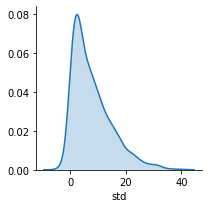

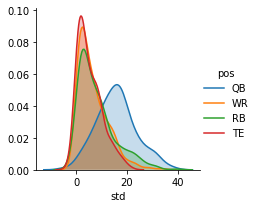

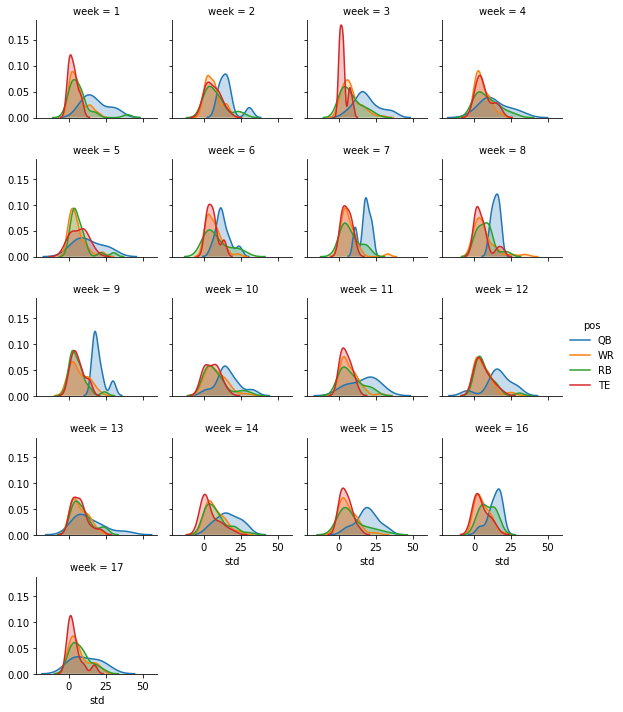

In [787]:
# prep data
df_games = pg_df.copy() # pg_df[pg_df['pos']=='QB'].copy()
df_games['std'] = (0.1*(df_games['rush_yards']+
                        df_games['rec_yards'])+
                   0.04*df_games['pass_yards']+
                   (-3)*(df_games['rush_fumbles']+
                       df_games['rec_fumbles']+
                       df_games['interceptions'])+
                   6*(df_games['rush_tds']+qb_games['rec_tds'])+
                   4*df_games['pass_tds'])
df_games['ppr'] = df_games['std']+df_games['receptions']
df_games['half_ppr'] = df_games['std']+0.5*df_games['receptions']

df_games[['pos','player_name','week','std','ppr','half_ppr']]

# univariate density plot
g = (sns.FacetGrid(df_games).
    map(sns.kdeplot,'std',shade=True))

# univariate density plot, multiple groups
g = (sns.FacetGrid(df_games, hue='pos').
    map(sns.kdeplot,'std',shade=True).
    add_legend())

# multiframe
g = (sns.FacetGrid(df_games,hue='pos',col='week',col_wrap=4,height=2)
    .map(sns.kdeplot,'std',shade=True)
    .add_legend())

                  rec_raw_airyards   targets   carries       ppr       std
rec_raw_airyards          1.000000  0.791787 -0.042175  0.589707  0.553359
targets                   0.791787  1.000000 -0.063028  0.723363  0.612425
carries                  -0.042175 -0.063028  1.000000  0.008317  0.013609
ppr                       0.589707  0.723363  0.008317  1.000000  0.976131
std                       0.553359  0.612425  0.013609  0.976131  1.000000


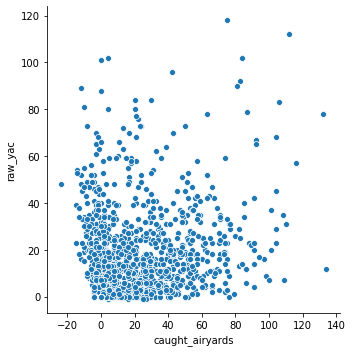

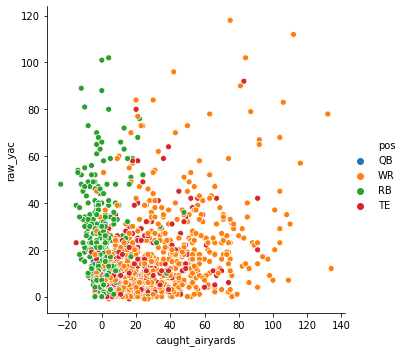

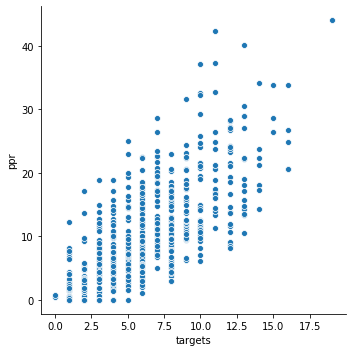

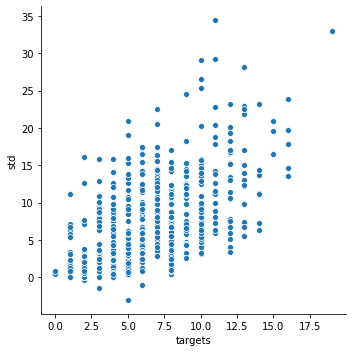

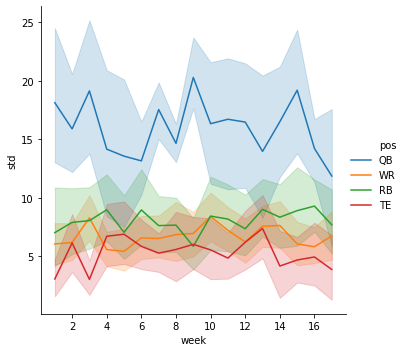

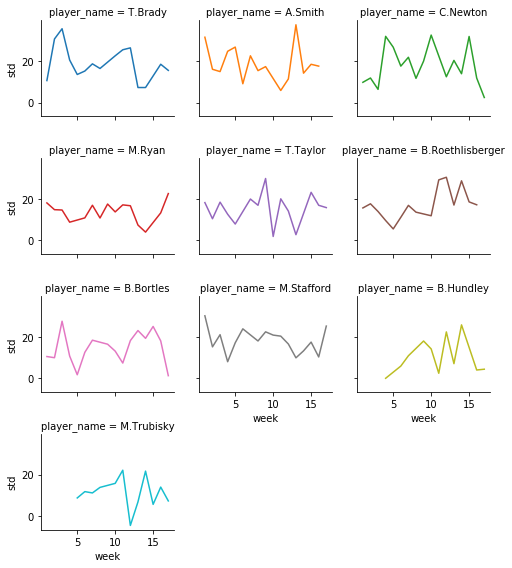

In [799]:
# relationships between variables in Python

# scatter plots
g = sns.relplot(x = 'caught_airyards', y = 'raw_yac', data = df_games)

g = sns.relplot(x = 'caught_airyards', y = 'raw_yac', hue = 'pos',
                data = df_games)

# correlation
print(df_games.loc[df_games['pos'] =='WR',
             ['rec_raw_airyards','targets','carries','ppr','std']
            ].corr())

# plotting correlated variables
g = sns.relplot(x = 'targets',
              y = 'ppr',
              data = df_games.query("pos=='WR'"))

g = sns.relplot(x = 'targets',
              y = 'std',
              data = df_games.query("pos=='WR'"))

# line plots
g = sns.relplot(x = 'week',
                y = 'std',
                kind = 'line',
                hue = 'pos',
                data = df_games)
    # default is to include 95% CIs for each group

g.savefig(path.join(OUT_DIR,'distribution_weekly_pts_by_pos.png'))

# plot for individual players in a position
g=sns.relplot(x='week',
              y='std',
              kind='line',
              hue='player_name',
              col='player_name',
              height=2,aspect=1.2,col_wrap=3,
              legend=False,
              data=df_games.query("pos=='QB'"))

### 7. Modeling

Model as describing relationship between one or more input variables (predictors) and an output variable (response).

Example: model to predict whether a play will result in a touchdown based on yards from endzone

        Input: yards_from_endzone
        
        Output: touchdown_probability
        
        Model: touchdown_probability = f(yards_from_endzone)

In [804]:
# Linear regression in Python

#load data
df=pd.read_csv(path.join(DATA_DIR,'play_data_sample.csv'))

# pre-process data
df=df.loc[(df['play_type'] =='run') | (df['play_type'] =='pass')]
        # i.e. exclude punts, field goals
df['offensive_td'] = ((df['touchdown'] == 1) 
                          & (df['yards_gained'] > 0))
        # exclude defensive touchdowns
df['offensive_td'] = df['offensive_td'].astype(int)
        # coerce indicator to dummy variable
df['yardline_100_sq'] = df['yardline_100'] ** 2
        # add a transformed feature
        
# fit model with statsmodels.ols (ordinary least squares)
model=smf.ols(
        formula='offensive_td~yardline_100+yardline_100_sq',
        data=df)
    
results = model.fit()

# review results of model fit
print(results.summary2())

# add predictions to dataframe
df['offensive_td_hat'] =results.predict(df)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.121   
Dependent Variable: offensive_td     AIC:                0.1547  
Date:               2021-05-23 17:01 BIC:                10.9389 
No. Observations:   269              Log-Likelihood:     2.9226  
Df Model:           2                F-statistic:        19.39   
Df Residuals:       266              Prob (F-statistic): 1.38e-08
R-squared:          0.127            Scale:              0.057937
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.3230   0.0441  7.3240 0.0000  0.2362  0.4098
yardline_100      -0.0112   0.0023 -4.8643 0.0000 -0.0157 -0.0066
yardline_100_sq    0.0001   0.0000  3.7609 0.0002  0.0000  0.0001
-----------------------------------------------------------------
Omnibus:              170.8

#### Statistical Signifance in Modeling

Attempt to answer the question of whether the effects the model is finding might be real.

Hypothesis testing takes a null hypothesis (e.g. model/parameter likely holds no significant information) and an alternative hypothesise (e.g. model/parameter likely has significant relationship) then assigns a p-value giving estimated probability that a result at least as extreme as the tested case would appear if the null hypothesis were true. That is, a low p-value (typically < 0.05) is taken to represent a statistically significant result.

        Parameter coefficients are evaluated with a t-statistic
        for multiple linear regression models
        
        Overall model fit is evaluated with an F-statistic
        for multiple linear regression models
        
#### Parameter Interpretations in Multiple LInear Regression

Coefficient values can be taken as "the fitted model finds a one unit change in {variable} is associated with a {coefficient} change in {response}, on average when holding all other variables constant"

If log transformations are used, parameters can still be interpreted:

        ln(y) = b0 + b1*ln(x1) + b2*x2
        
        "model predicts 1% change in x1 associated with a b1% 
        change in y, on average"
        
        "model predicts 1 unit change in x2 associated with b2%
        change in y, on average"

#### Fixed Effects

Perhaps best way to include the m levels of a variable into a multiple linear regression model is to turn those m unique values into (m-1) indicator variables (use m-1 instead of m because if it is not any of 1:m-1 then it must be m)

        Pandas gives dummy variables: 
        pd.get_dummies(df['variable'], drop_first =  True)
        
#### Feature Transformations

Squares, cubes, etc. may be useful when the plot of a variable against the response indicates an higher than 1st degree interaction

Additionally, the log of variables may be useful (response, predictors, both) because the log transformation can make distributions approximately more normal, which is a requirement of linear modeling

        Linearity
        
        Independence of variables
        
        Normality of variables / residuals
        
        Equality of variances
        
 
#### Interactions

Interactions between variables can be introduced as a variable given by the product of the two (or more) variables

In [805]:
# logistic regression in Python
smf.logit(formula=
          'touchdown~yardline_100+yardline_100_sq',
          data=df)

results=model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.121   
Dependent Variable: offensive_td     AIC:                0.1547  
Date:               2021-05-23 17:21 BIC:                10.9389 
No. Observations:   269              Log-Likelihood:     2.9226  
Df Model:           2                F-statistic:        19.39   
Df Residuals:       266              Prob (F-statistic): 1.38e-08
R-squared:          0.127            Scale:              0.057937
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.3230   0.0441  7.3240 0.0000  0.2362  0.4098
yardline_100      -0.0112   0.0023 -4.8643 0.0000 -0.0157 -0.0066
yardline_100_sq    0.0001   0.0000  3.7609 0.0002  0.0000  0.0001
-----------------------------------------------------------------
Omnibus:              170.8

#### Random Forests

Linear and logistic regression useful for analyzing relationships between data (coefficients) and making predictions (new data -> model -> predictions)

Random Forests are generally more flexible and make fewer assumptions, but don't give information for interpreting relationships between data as easily. 

##### Classification and regression Tree (CART)

CART is a single tree made up of splits along variables, which essentially filter observations down to some outcome through a series of if/then decision rules.

Stopping criterion for adding more branches can be: all branches are pure (100% matching), a certain number of splits is reached, a branch has some number of samples in it from the training set, an accuracy metric is reached.

Pruning = removing some of the latter branches to reduce potential issues from overfitting

##### Random Forests are Many Trees

Random Forest attempts to aggregate multiple CARTs into single outcome. These CARTs are created by a randomized bootstrap aggregation. A bootstrap sample is taken, then for each split a random subset of m of the p features is taken, from which the "optimal" split is evaluated. More specifically, bagging trees are the special case of a Random Forest for m=p.

For regression, the aggregatiom can be by taking the mean or median prediction of individual CARTs, for example. In classification, you might take the average of probability for each class across all CARTs.

In [841]:
# Random Forest example with scikit-learn
np.random.seed(10)

# create X and Y
xvars = ['carries','rush_yards','rush_fumbles',
        'rush_tds','targets','receptions','rec_yards',
        'raw_yac','rec_fumbles','rec_tds','ac_tds',
        'rec_raw_airyards','caught_airyards','attempts',
        'completions','pass_yards','pass_raw_airyards',
        'comp_airyards','timeshit','interceptions','pass_tds',
        'air_tds']
yvar = 'pos'

# create train/test split (80% train, 20% test)
train, test = skms.train_test_split(
    pg_df, test_size=0.20)

# fit Random Forest with 100 trees
model = skens.RandomForestClassifier(n_estimators=100)
model.fit(train.loc[:,xvars],train.loc[:,yvar])

# view perfomance on test fit
test['pos_hat'] = model.predict(test.loc[:,xvars])
test['correct'] = (test['pos_hat'] == test['pos'])
print(test['correct'].mean()) # average accuracy

# prediction probabilities by class for each obs
probs = pd.DataFrame(
    model.predict_proba(test[xvars]),
    index=test.index,
    columns=model.classes_)
probs.head()


results=pd.concat([
    test[['player_id','player_name','pos','pos_hat','correct']],
    probs],
    axis=1)

results.sample(10)

# accuracy by position
results.groupby('pos')[['correct','QB','RB','WR','TE']].mean()

0.7979094076655052


C:\Users\calvi\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\calvi\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,correct,QB,RB,WR,TE
pos,,,,,
QB,1.000000,0.995625,0.002812,0.000937,0.000625
RB,0.977778,0.000111,0.939778,0.038093,0.022019
TE,0.120000,0.002200,0.050200,0.672313,0.275287
WR,0.895652,0.000957,0.035130,0.752177,0.211736


In [850]:
# random forest with cross validation
model = skens.RandomForestClassifier(n_estimators=100)
scores = skms.cross_val_score(model,pg_df[xvars],pg_df[yvar],cv=10)

print(scores) # accuracy for each of the 10 folds

# Random Forest feature importance
model = skens.RandomForestClassifier(n_estimators=100)
model.fit(train.loc[:,xvars],train.loc[:,yvar])
pd.Series(model.feature_importances_,xvars).sort_values(ascending=False)

[0.79861111 0.82517483 0.83216783 0.85314685 0.81118881 0.81118881
 0.76223776 0.76223776 0.74825175 0.78321678]


rec_raw_airyards     0.180451
carries              0.150423
caught_airyards      0.114350
rush_yards           0.101147
rec_yards            0.075687
raw_yac              0.062665
targets              0.050479
receptions           0.038939
pass_raw_airyards    0.037887
attempts             0.036709
completions          0.032321
pass_yards           0.022606
comp_airyards        0.021960
rec_tds              0.016770
pass_tds             0.016577
timeshit             0.016221
rush_tds             0.008824
ac_tds               0.006292
rec_fumbles          0.003826
air_tds              0.002512
rush_fumbles         0.002149
interceptions        0.001206
dtype: float64

Note: scikit-learn uses RandomForestClassifier for classification and RandomForestRegressor for regression

### 8. Intermediate Coding and Next Steps: High Level Strategies

##### Gall's Law

"A complex system that works is invariably found to have evolved from a simple system that worked." - John Gall

Takeaway: start with simple model, ensure it works, then iteratively add complexity

##### Get Quick Feedback

Test new pieces as soon as you can, since it can be hard to backtrack and find out where you went wrong.

##### Use Functions

Don't repeat yourself - functions package code so that it can be reused more compactly

Reasoning which is stored in a function doesn't need to be recalled every (consistently!) each time you want to apply the same reasoning.

##### Attitude

Take pride in your code. Well-designed, functioning, with an idea of what will come next, and clear documentation of how the code that's there works.

### 9. Conclusion

Recommend that practitioners seek additional projects & complete their own analysis ASAP - it is the only way to solidify skills and gain expertise.

